# **Setup**

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from scipy import stats

# **Dataset**

In [2]:
# Available Datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## **Iris Dataset**

In [3]:
iris = sns.load_dataset('iris')

print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.groupby('species').agg(['mean'])

,sepal_length,sepal_width,petal_length,petal_width
,mean,mean,mean,mean
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## **Titanic Dataset**

In [27]:
titanic = sns.load_dataset('titanic')

print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Gapminder Dataset**

In [39]:
gapminder = px.data.gapminder()

print(gapminder.shape)
gapminder.head()

(1704, 8)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


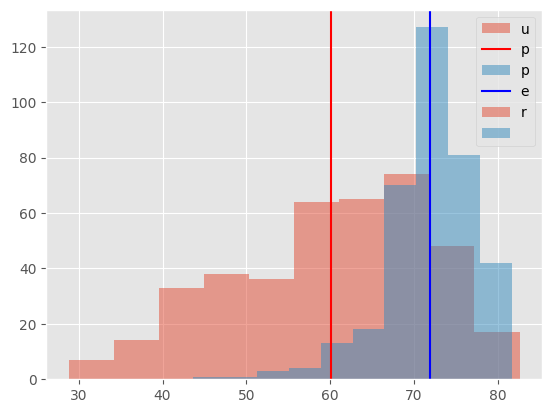

In [63]:
from cProfile import label
from bcrypt import kdf


sample1 = gapminder[gapminder['continent']=='Asia']['lifeExp']
sample2 = gapminder[gapminder['continent']=='Europe']['lifeExp']

plt.hist(sample1,alpha=0.5,label='Asia')
plt.axvline(sample1.mean(),color='Red')
plt.hist(sample2,alpha=0.5,label='Europe')
plt.axvline(sample2.mean(),color='Blue')
plt.legend('upper right')
plt.show()

## **Tips**

In [104]:
tips = sns.load_dataset('tips')

print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# **Miscellaneous Tests**

## **Normality Test 01**

**Hypothesis**
* Shapiro-Wilk Normality Test
* H0: Data is Normal
* Ha: Data Is Not Normal

**P-Value Interpretation**
* P-Value > $\alpha$   : Data Is Normally Distributed
* P-Value <= $\alpha$  : Data Is Not Normally Distributed  

In [5]:
from scipy.stats import shapiro

# Check for normality of the sepal_length data
statistic, p_value = shapiro(iris['sepal_length'])

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 0.98
P-Value: 0.01


In [6]:
from scipy.stats import shapiro

# Species: Setosa
# Check for normality of the sepal_length data 
statistic, p_value = shapiro(iris[iris['species']=='setosa']['sepal_length'])

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 0.98
P-Value: 0.46


## **Normality Test 02**
Kolmogorov-Smirnov Test

In [90]:
# All Species Combined 
sample = iris['sepal_length']

# Perform the Kolmogorov-Smirnov test
test_statistic, p_value = stats.kstest(sample,'norm')

print('Test statistic:', test_statistic)
print('P-value:', p_value)

Test statistic: 0.999991460094529
P-value: 0.0


In [94]:
# setosa Species
sample = iris[iris['species']=='setosa']['sepal_length']

# Perform the Kolmogorov-Smirnov test
test_statistic, p_value = stats.kstest(sample,'norm')

print('Test statistic:', test_statistic)
print('P-value:', p_value)

Test statistic: 0.999991460094529
P-value: 7.476238875146382e-254


## **Normality Plot**

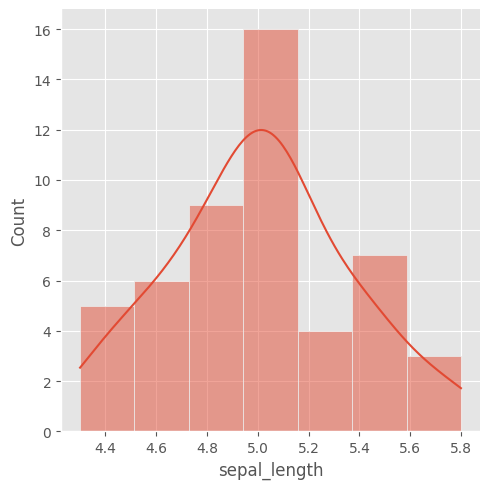

In [99]:
# setosa Species
sample = iris[iris['species']=='setosa']['sepal_length']

fig = sns.displot(sample,kde=True)
plt.show()

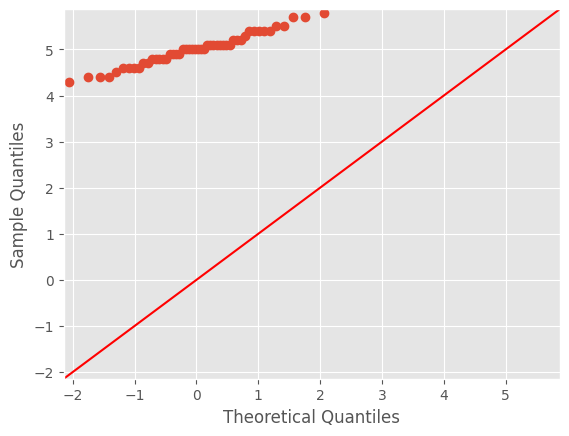

In [96]:
# setosa Species
sample = iris[iris['species']=='setosa']['sepal_length']

fig = sm.qqplot(sample, line='45')
plt.show()

## **Symmetry Test**
Wilcoxon Signed Rank Test (Non-Parametric)

**Hypothesis**
* H0: Data is symmetrically distributed
* Ha: Data is not symmetrically distributed



In [7]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon Signed Rank Test
statistic, p_value = wilcoxon(iris['sepal_length'] - 5.84,alternative='two-sided')

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 5621.00
P-Value: 0.94


## **Equality Of Variance**

Levene Test

**Hypothesis**
* H0: Sample_01 Variance = Sample_02 Variance
* Ha: Sample_01 Variance != Sample_02 Variance

In [8]:
iris.groupby('species')['sepal_length'].agg(['var'])

,var
species,
setosa,0.124249
versicolor,0.266433
virginica,0.404343


In [9]:
from scipy.stats import levene

sample01 = iris[iris['species']=='setosa']['sepal_length']
sample02 = iris[iris['species']=='versicolor']['sepal_length']

# Test the equality of variance
statistic, p_value = levene(sample01, sample02)

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 8.17
P-Value: 0.01


## **Equality Of Proportion**

Chi2 Test

In [10]:
pd.crosstab(iris['species'], iris['sepal_length'])

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,
setosa,1,3,1,4,2,5,4,8,8,3,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,0,0,1,2,1,1,...,1,1,1,0,0,0,0,0,0,0
virginica,0,0,0,0,0,0,1,0,0,0,...,2,3,0,1,3,1,1,1,4,1


In [11]:
from scipy.stats import chi2_contingency

# Perform the Chi-Squared Test
statistic, p_value, dof, expected = chi2_contingency(pd.crosstab(iris['species'], iris['sepal_length']))

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 156.27
P-Value: 0.00


# **One Sample Data**

## **Z-Test**

**Note**
* If Sample has >= 30 Observation, Use Z-Test
* If Sample has <30 Observations, Use T-Test

In [12]:
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(iris['sepal_length'], value=5.84)

# Print the results
print("T-Statistic: {:.2f}".format(z_statistic))
print("P-Value: {:.2f}".format(p_value))

T-Statistic: 0.05
P-Value: 0.96


## **T-Test**

In [13]:
# Data Sampling
data = iris['sepal_length'].sample(n=25)
print(data.shape)

(25,)


In [14]:
# Check Actual Sepal Length Mean
iris['sepal_length'].mean()

5.843333333333334

In [15]:
type(iris['sepal_length'].values)

numpy.ndarray

In [16]:
# Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Sepal_Len_Std = scaler.fit_transform(iris['sepal_length'].values.reshape(-1,1))

print(type(Sepal_Len_Std))
print('Standardized Data Shape: ',Sepal_Len_Std.shape)

<class 'numpy.ndarray'>
Standardized Data Shape:  (150, 1)


T-Statistic: 0.05
P-Value: 0.96


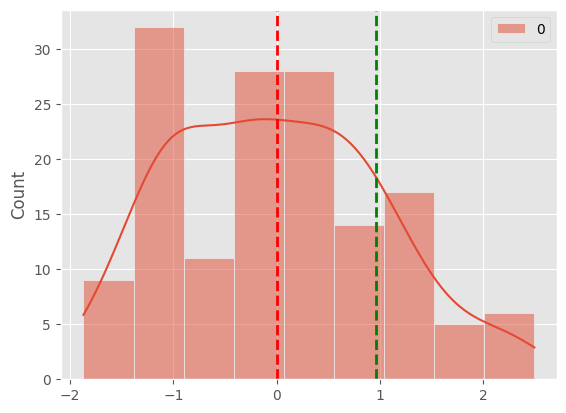

In [17]:
# T-Test To Check if Mean Sepal Length = 5.84
data = iris['sepal_length']
t_statistic, p_value = stats.ttest_1samp(a=data,popmean=5.84,alternative='two-sided')

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.2f}".format(p_value))

# Plot the distribution of sepal length values
data_std = scaler.fit_transform(iris['sepal_length'].values.reshape(-1,1))
sns.histplot(data_std, kde=True)
plt.axvline(data_std.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(p_value, color='green', linestyle='dashed', linewidth=2)
plt.show()

## **Power Of Test**

In [88]:
from statsmodels.stats.power import TTestIndPower

# Define the effect size, sample size, and significance level
effect_size = 0.5
sample_size = 100
alpha = 0.05

# Calculate the power of the test
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha)

print('Power of the test:', power)

Power of the test: 0.9404271933839895


# **Two Sample Data**

## **Compare Mean**

### **T-Test - Dependent**

* AKA Paired T-Test

In [24]:
# Create the two samples
sample1 = iris[iris['species'] == 'setosa']['sepal_length'].sample(n=15, random_state=1)
sample2 = iris[iris['species'] == 'setosa']['sepal_length'].sample(n=15, random_state=2)

# Perform the paired T-Test
t_statistic, p_value = stats.ttest_rel(sample1, sample2)

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.2f}".format(p_value))

# Calculate the confidence interval for the difference in mean
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(sample1), sms.DescrStatsW(sample2))
lower, upper = cm.tconfint_diff(alpha=0.05,alternative='two-sided',usevar='unequal')

# Print the results
print("Confidence Interval: ({:.2f}, {:.2f})".format(lower, upper))

T-Statistic: 0.14
P-Value: 0.89
Confidence Interval: (-0.21, 0.24)


### **T-Test - Independent**

* 2 Independent Samples

In [19]:
# Create the two samples
sample1 = iris[iris['species'] == 'versicolor']['sepal_length'].sample(n=25, random_state=1)
sample2 = iris[iris['species'] == 'virginica']['sepal_length'].sample(n=25, random_state=1)

# Perform the two-sample T-Test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.2f}".format(p_value))

T-Statistic: -3.82
P-Value: 0.00


## **Compare Variance**

## **Compare Proportion**

In [26]:
from statsmodels.stats.proportion import proportions_ztest

# Create the two samples
sample1 = iris[iris['species'] == 'setosa']['sepal_length']
sample2 = iris[iris['species'] == 'virginica']['sepal_length']

# Perform the proportion test
count = [sum(sample1 < 5.84), sum(sample2 < 5.84)]
nobs = [len(sample1), len(sample2)]
statistic, p_value = proportions_ztest(count, nobs)

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 8.86
P-Value: 0.00


In [36]:
from scipy.stats import chi2_contingency

# Create a contingency table
table = pd.crosstab(titanic['sex'], titanic['survived'])
print(table)

# Perform the chi-squared test
statistic, p_value, dof, expected = chi2_contingency(table)

# Print the results
print('\n')
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))
print('DOF: ',dof)
print('Expected Value: ','\n',expected)

survived    0    1
sex               
female     81  233
male      468  109


Statistic: 260.72
P-Value: 0.00
DOF:  1
Expected Value:  
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


# **Three Sample**

## **One-Way ANOVA**

* To Check if Mean of 3 or More Samples is Equal

In [20]:
from scipy.stats import f_oneway

sample01 = iris[iris['species'] == 'setosa']['sepal_length']
sample02 = iris[iris['species'] == 'versicolor']['sepal_length']
sample03 = iris[iris['species'] == 'virginica']['sepal_length']

# Perform the one-way ANOVA test
statistic, p_value = f_oneway(sample01,sample02,sample03)

# Print the results
print("Statistic: {:.2f}".format(statistic))
print("P-Value: {:.2f}".format(p_value))

Statistic: 119.26
P-Value: 0.00


## **ANOVA Table**

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('sepal_length ~ species', data=iris).fit()

# Create the ANOVA table
table = sm.stats.anova_lm(model, typ=2)
table.loc['total',:] = [(table['sum_sq'].sum()),table['df'].sum(),0,0] # Add SST Row To ANOVA Table

# Print the ANOVA table
table

,sum_sq,df,F,PR(>F)
species,63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN
total,102.168333,149.0,0.000000,0.000000e+00


## **Tukey Table**
* Used to identify which sample is causing inequality.
* This is done by performing a pairwise comparison of samples.

In [68]:
tukey_results = sm.stats.multicomp.pairwise_tukeyhsd(gapminder['lifeExp'], gapminder['continent'])
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
  Africa Americas  15.7934    0.0 14.0223 17.5645   True
  Africa     Asia  11.1996    0.0  9.5799 12.8193   True
  Africa   Europe  23.0384    0.0 21.3699 24.7068   True
  Africa  Oceania  25.4609    0.0 20.2169 30.7048   True
Americas     Asia  -4.5938    0.0 -6.5234 -2.6642   True
Americas   Europe   7.2449    0.0  5.2742  9.2157   True
Americas  Oceania   9.6675    0.0  4.3197 15.0153   True
    Asia   Europe  11.8388    0.0  10.003 13.6746   True
    Asia  Oceania  14.2613    0.0  8.9617 19.5609   True
  Europe  Oceania   2.4225 0.7251 -2.8922  7.7372  False
--------------------------------------------------------


## **Chi2 - Goodness Of Fit Test**

* Used to compare the proportion of categorical Variables in a randomly selected sample data

Sampled Data Size:  (50, 5)


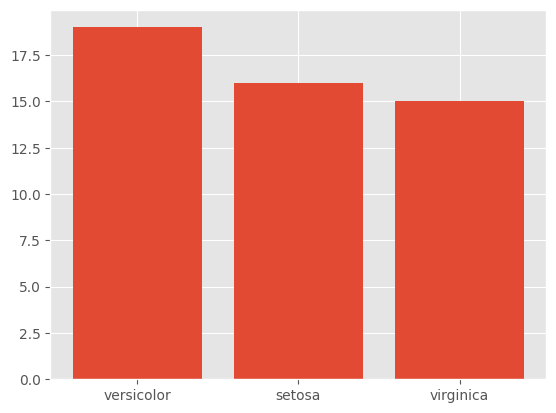

In [76]:
iris_sampled = iris.sample(n=50)
print('Sampled Data Size: ',iris_sampled.shape)

plt.bar(iris_sampled['species'].value_counts().index,iris_sampled['species'].value_counts().values)
plt.show()

In [84]:
# Compute the observed frequencies for each species in the sample
observed_frequencies = np.array([np.count_nonzero(iris_sampled == species) for species in iris['species'].unique()])
print('Observed Frequencies',observed_frequencies)

# Compute the expected frequencies assuming equal proportions for each species
expected_frequencies = np.array([len(iris_sampled) / len(iris['species'].unique())] * len(iris['species'].unique()))
print('Expected Frequencies',expected_frequencies)

# Perform the Chi2 goodness of fit test
chi2_statistic, p_value = stats.chisquare(observed_frequencies, expected_frequencies)

print('\n')
print('Chi2 statistic:', chi2_statistic)
print('P-value:', p_value)

Observed Frequencies [16 19 15]
Expected Frequencies [16.66666667 16.66666667 16.66666667]


Chi2 statistic: 0.52
P-value: 0.7710515858035664


## **Chi2 - Independence Test**
* Used to test the independence of 2 categorical variables

In [86]:
# Create a contingency table of the Sex and Passenger class variables
contingency_table = pd.crosstab(titanic['sex'], titanic['class'])

# Perform the Chi2 Independence test
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(contingency_table)

print('Chi2 statistic:', chi2_statistic)
print('P-value:', p_value)

Chi2 statistic: 16.971499095517114
P-value: 0.00020638864348233114


# **Regression Analysis**

In [107]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
import statsmodels.formula.api as smf

# Fit a multiple linear regression model
model = smf.ols('tip ~ total_bill + size', data=tips).fit()

# Print the regression analysis table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.67e-34
Time:                        19:40:08   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0